In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

col_name = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
            'horsepower','peak-rpm','city-mpg','highway-mpg','price']
df = pd.read_csv('imports-85.data', names=col_name)
df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [53]:
df.select_dtypes(include='object').head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500,17450


In [54]:
df[['normalized-losses','bore', 'stroke', 'horsepower', 'peak-rpm', 'price']] = df[['normalized-losses','bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].astype(float)

In [55]:
df.shape

(205, 26)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [57]:
cate_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [58]:
df[cate_cols].isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

In [59]:
df[num_cols].isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [60]:
df.dropna(subset=['num-of-doors'], inplace=True, axis=0)

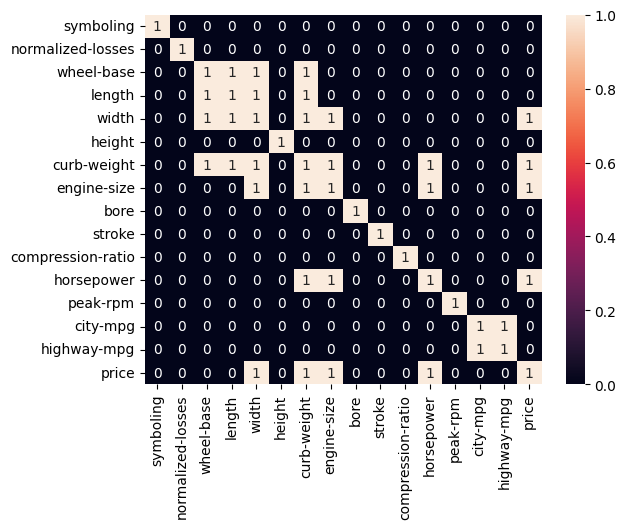

In [61]:
sns.heatmap(df[num_cols].corr() > 0.7, annot=True)
plt.show()

In [62]:
col_remove = ['length', 'wheel-base', 'curb-weight', 'city-mpg']
for col in col_remove:
    num_cols.remove(col)

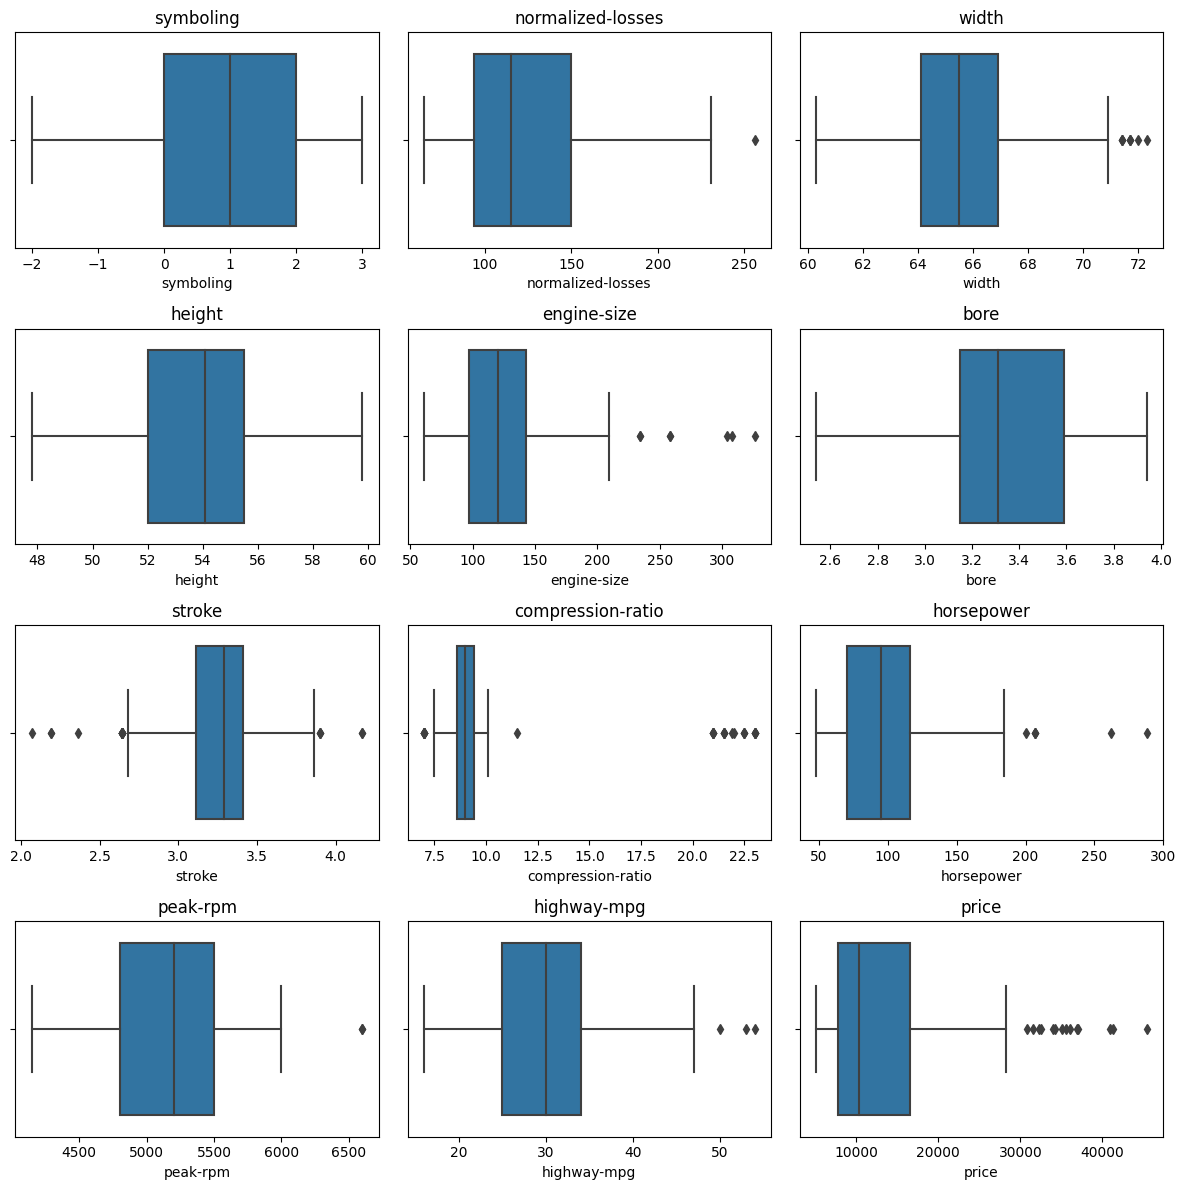

In [84]:
import math
fg, axes = plt.subplots(math.ceil(len(num_cols) / 3), 3, figsize=(12,12))
axes = axes.flat
for i,col in enumerate(num_cols): 
    sns.boxplot(df, x=col, ax=axes[i])
    axes[i].set_title(col)
    plt
plt.tight_layout()    
plt.show()  

In [65]:
df[cate_cols].nunique()

make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          7
num-of-cylinders     7
fuel-system          8
dtype: int64

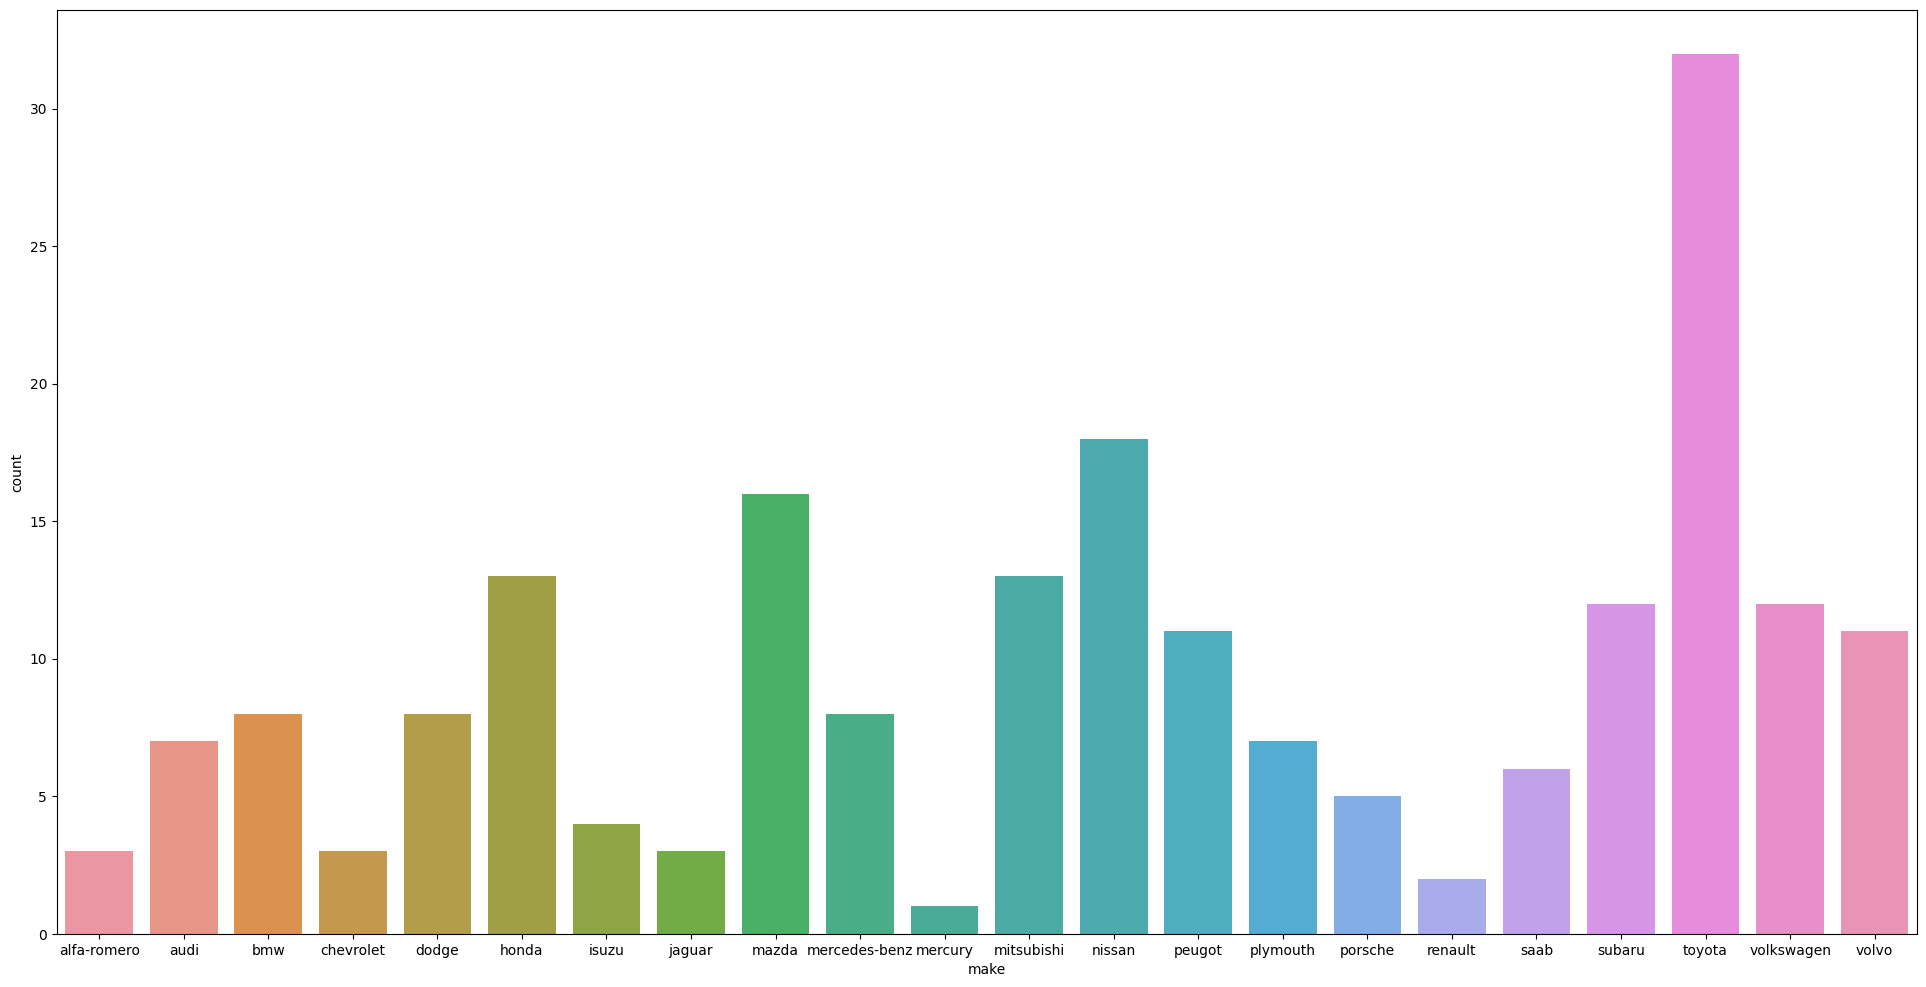

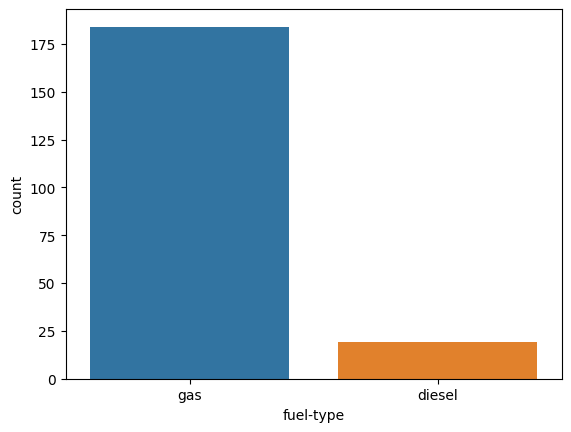

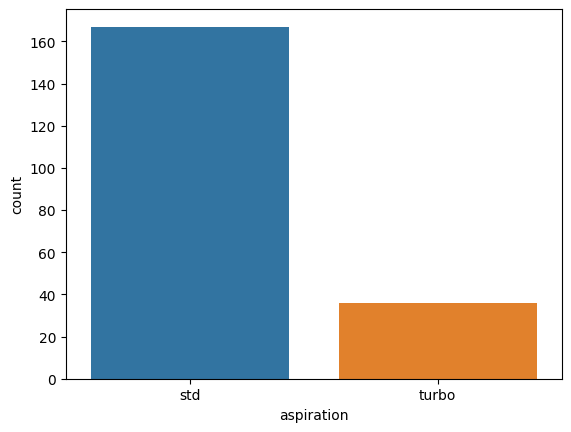

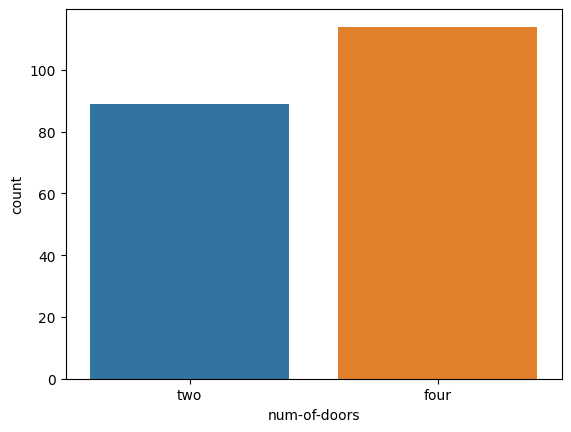

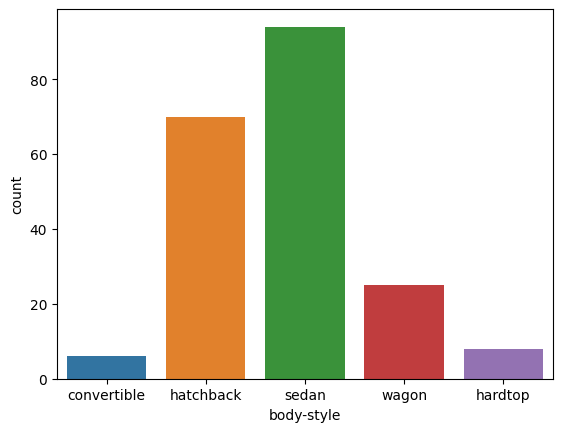

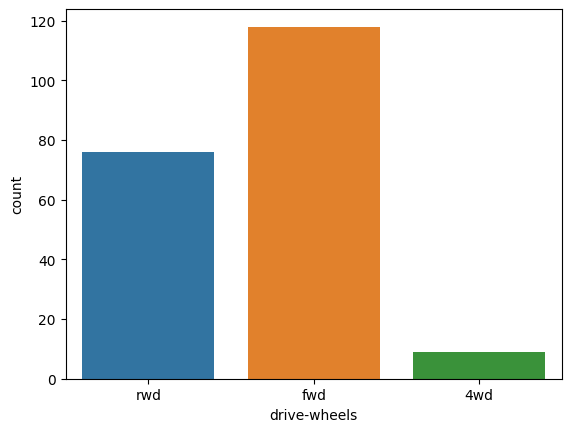

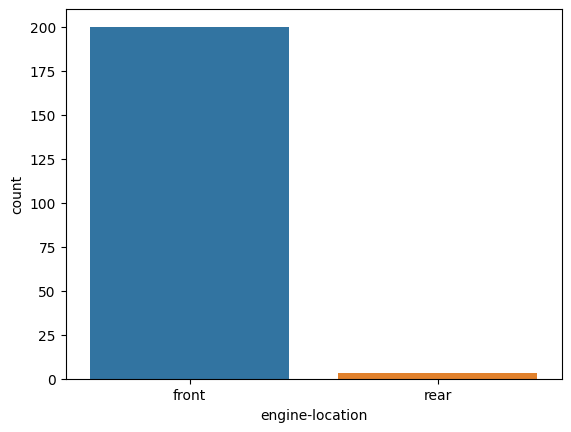

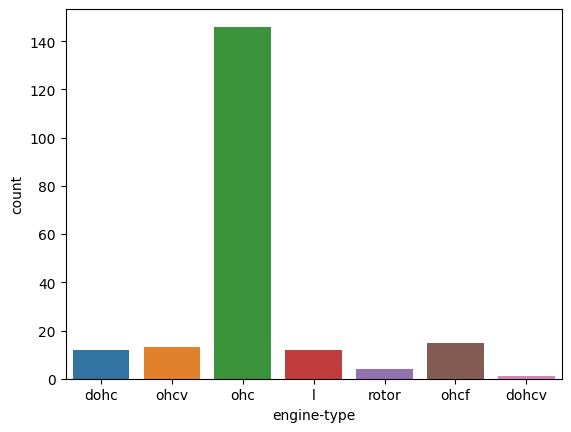

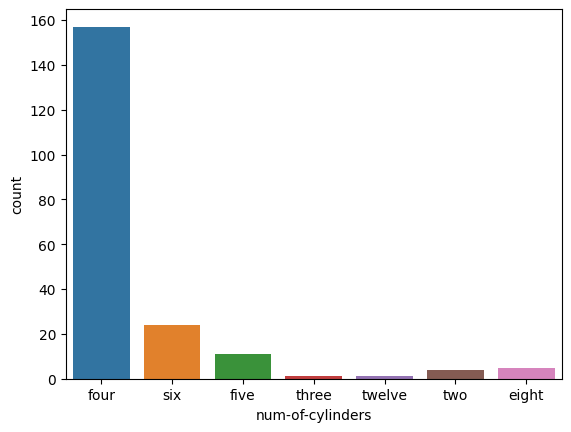

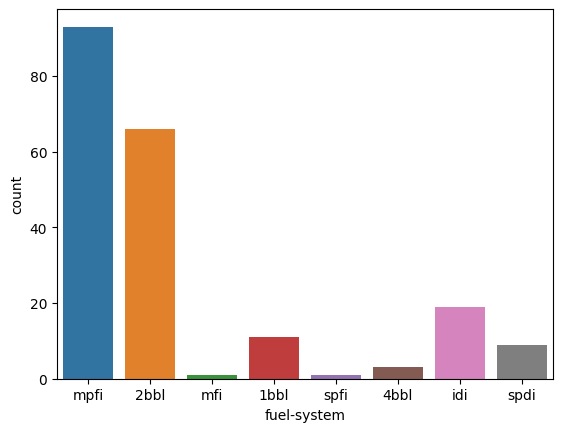

In [82]:
plt.figure(figsize=(24,12))
for col in cate_cols:
    sns.countplot(df, x=col)
    plt.show()